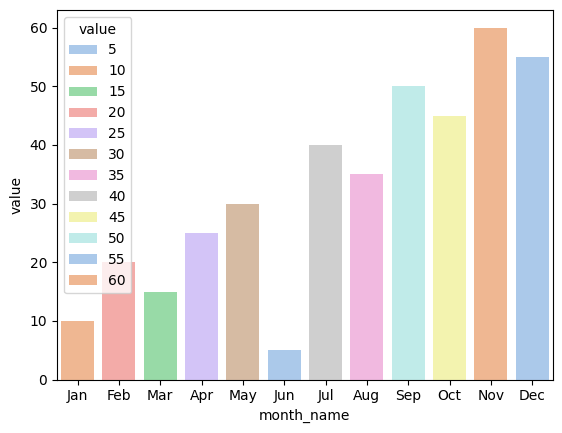

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'month_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'month_name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'value': [10, 20, 15, 25, 30, 5, 40, 35, 50, 45, 60, 55]  # Example numeric values
}

df = pd.DataFrame(data)

# Set the order of x-axis based on month_number
order = df.sort_values('month_number')['month_name']

# Plot the bar chart
sns.color_palette(palette='Accent')
sns.barplot(x='month_name',
            y='value', 
            data=df, 
            order=order,
            hue = 'value',
            palette = "pastel"
)

# Display the plot
plt.show()

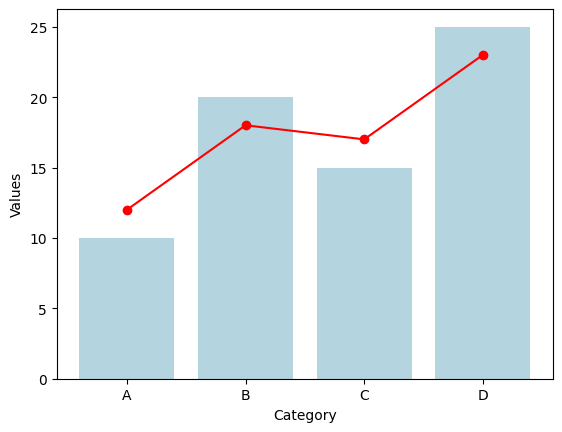

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25],
    'LineValues': [12, 18, 17, 23]
}

# Create the bar plot
sns.barplot(x='Category', y='Values', data=data, color='lightblue')

# Overlay the line plot
plt.plot(data['Category'], data['LineValues'], marker='o', color='red')

# Show the plot
plt.show()

C:\Users\fisch\AppData\Local\Programs\Python\Python312\python.exe -m pip install scipy

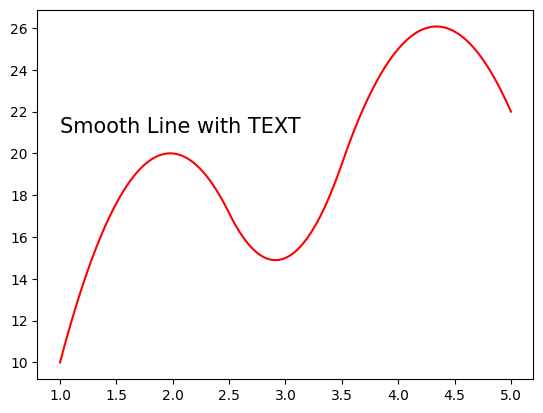

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 15, 25, 22])

# Create a smooth line using cubic spline interpolation
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # k=3 is cubic spline
y_smooth = spl(x_new)

# Plot the smooth line
plt.plot(x_new, y_smooth, color='red')

plt.text(1.0, 21, 'Smooth Line with TEXT', fontsize=15)

plt.show()


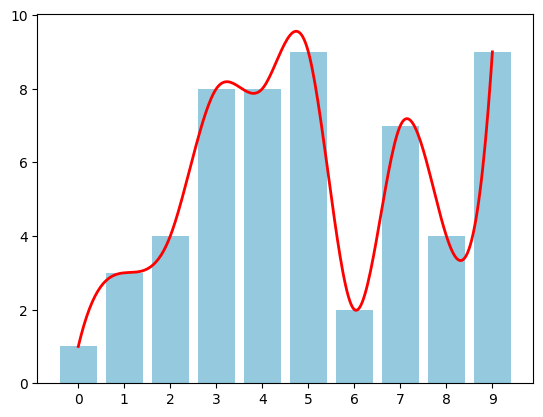

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Sample data
x = np.arange(10)
y = np.random.randint(1, 10, size=10)

# Create the barplot
sns.barplot(x=x, y=y, color='skyblue')

# Generate smoothed data using scipy's make_interp_spline
x_smooth = np.linspace(x.min(), x.max(), 300)  # More points for a smoother line
spl = make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Plot the smoothed line
plt.plot(x_smooth, y_smooth, color='red', lw=2)

# Display the plot
plt.show()


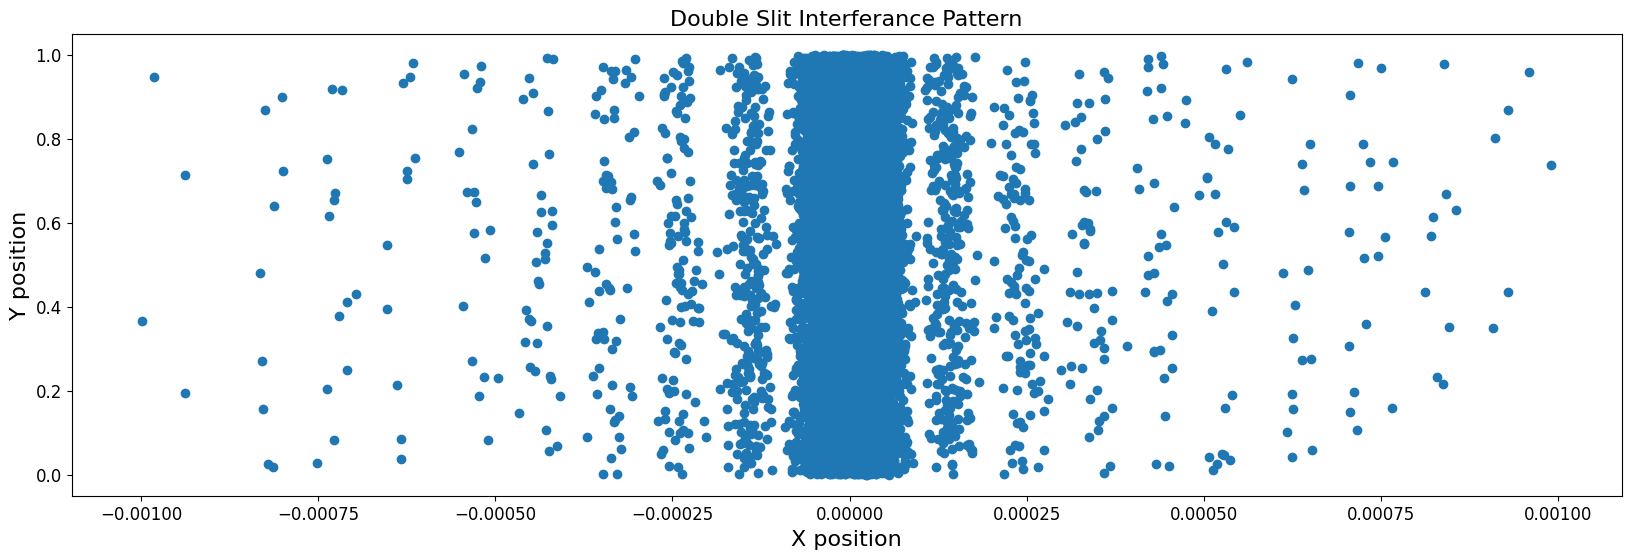

<Figure size 1200x600 with 0 Axes>

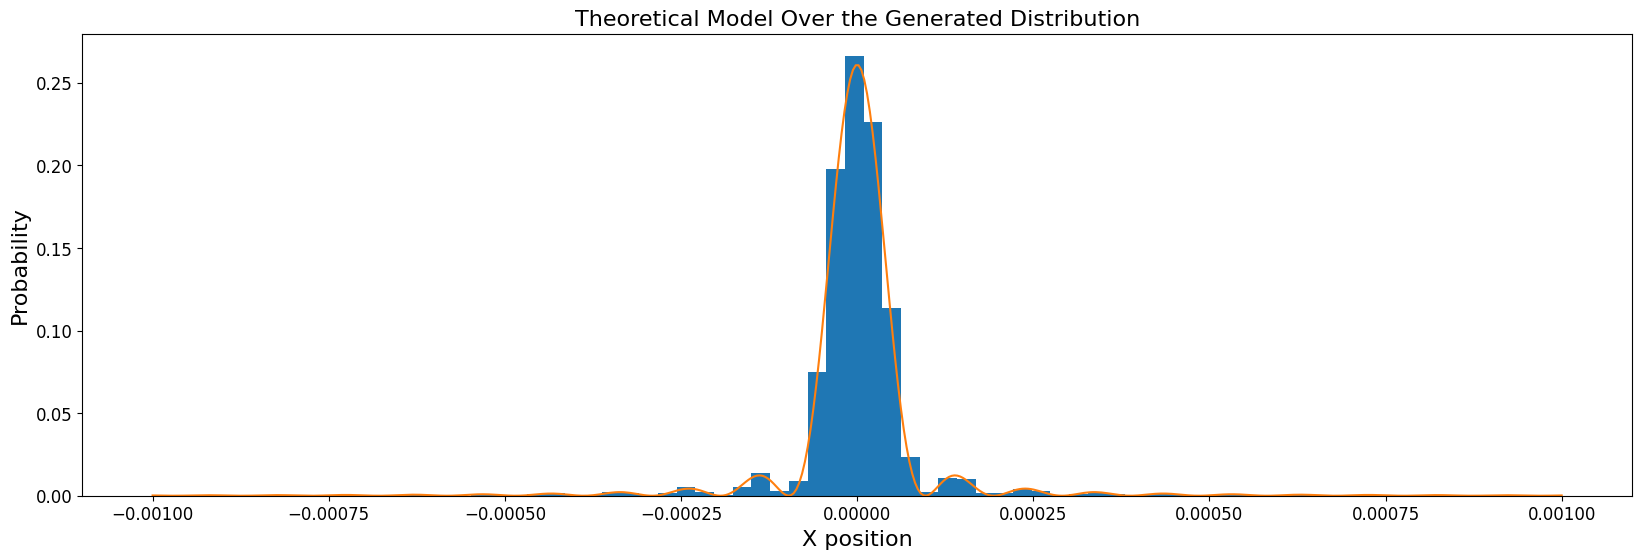

In [5]:
# https://medium.com/@ln8378/simulation-103-monte-carlo-modeling-quantum-mechanics-22b79a0110e9

import numpy as np
import matplotlib.pyplot as plt

#Parameters used
#m = Particle mass in kg
#v = Particle velocity in m/s                   

#lamb = h/(m*v) "de broglie wavelength", scaled to be used in this modeled, h = 6.62 × 10^−34 Js. 
#a = Slit width in meters
#d = Distance between slits in meters
#l = Distance to screen in meters

def Diffraction(a,d,lamb,l,x):
    
    #Calculating some constants
    c = (np.pi*d)/(lamb*l)
    k = (np.pi*a)/(lamb*l)
    
    #Probability function
    probability = ((np.cos(c))**2)*(((np.sin(k*x))/(k*x))**2)
    
    return probability

def MonteCarlo(a,d,lamb,l):
    
    #Monte carlo throw for a particle at a given position on our viewing screen
    x = np.random.uniform(-.001,.001)
    
    p = Diffraction(a,d,lamb,l,x)
    rand = np.random.uniform(0,1)
    
    if (p >= rand):
        return x

#Parameters of our system
m= 9.1*10**-31 #Mass of electron
v= 5*10**5 #velocity                     

lamb = 6.62*10**-34/(m*v) #de broglie wavelength, scaled to be used in this modeled, h = 1. 
a = 150*10**-6 #Slit width
d = 600*10**-6 #Distance between slits
l = 10 #Distance to screen

#The loop that runs the monte carlo to generate the interferance pattern
numParticles = 10**6
particles = []
for i in range(numParticles):
    #Rolling a random y value as well to give our bands vertical spread
    y = np.random.uniform(0,1)
    
    x = MonteCarlo(a,d,lamb,l)
    
    if x != None:
        particles.append([x,y])

#Visualize of the interferance pattern 
particles = np.array(particles)
plt.figure(figsize = (20,6))
plt.scatter(particles[:,0],particles[:,1])
plt.title("Double Slit Interferance Pattern", fontsize = 16)
plt.xlabel("X position", fontsize = 16)
plt.ylabel("Y position", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#plt.show() 

plt.figure(figsize = (12,6))

plt.tight_layout()
plt.show()

#Showing that the generated model fits the theoretical model.
plt.figure(figsize = (20,6))
weights = np.ones_like(particles[:,0])/float(len(particles[:,0]))
plt.hist(particles[:,0], bins = 75,  weights=weights)#density = True)

x = np.linspace(-.001,.001,500)
plt.plot(x,Diffraction(a,d,lamb,l,x)) #max(p) is there to normalize the function.
plt.title("Theoretical Model Over the Generated Distribution",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)
plt.xlabel("X position",fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()